
# Sentiment Analysis on COVID-19 Tweets Using RNN


### Tools & Libraries
Keras, TensorFlow, Pandas, NumPy, Scikit-Learn, Matplotlib, Seaborn, NLTK

## 1. Introduction
This project focuses on performing sentiment analysis on tweets related to COVID-19 using Recurrent Neural Networks (RNN). The aim is to classify tweets as **Extremely Positive, Positive, Neutral, Negative, or Extremely Negative** based on public sentiment. The model is fine-tuned with hyperparameter optimization and evaluated on real-world COVID-19 tweet data.

## 2. Dataset Description

**COVID-19 Tweets Dataset**
- **Training Set:** 40,000 samples
- **Test Set:** 10,000 samples

**Labels:**
- Extremely Positive
- Positive
- Neutral
- Negative
- Extremely Negative

## 3. Objective
The primary objectives of this project are:
- To build an **RNN-based model** for sentiment classification of COVID-19 tweets.
- To perform **text preprocessing** to clean and structure the dataset.
- To **fine-tune hyperparameters** to improve model performance.
- To evaluate the model using various **performance metrics** and visualization techniques.

## 4. Data Preprocessing

### 4.1 Data Cleaning
The dataset undergoes multiple preprocessing steps:
- **Lowercasing:** Ensuring uniform text format.
- **Removing URLs, mentions (@usernames), and hashtags** to eliminate noise.
- **Removing special characters, numbers, and punctuation** for better tokenization.
- **Removing stopwords** to focus on meaningful words.
- **Tokenization:** Converting text into numerical sequences.
- **Padding sequences** to ensure consistent input size for the model.

### 4.2 Encoding Labels
- Mapping **Extremely Positive, Positive, Neutral, Negative, and Extremely Negative** labels into numerical categories for multi-class classification.

## 5. Model Architecture and Iterations

### 5.1 Baseline Model
We started with a **basic RNN model** as an initial benchmark.

- **Embedding Layer:** 100 dimensions
- **RNN Layer:** 128 units
- **Dense Layers:**
  - 128 units with ReLU activation
  - Output layer with Softmax activation (for multi-class classification)
- **Dropout:** 0.2 (to reduce overfitting)
- **Optimizer:** Adam with a learning rate of 0.0001
- **Loss Function:** Categorical Crossentropy
- **Callbacks:**
  - EarlyStopping (patience = 5)
  - ModelCheckpoint to save the best model

**Results:**
- Validation Accuracy: **78.6%**
- Test Accuracy: **77.9%**
- Neutral sentiment was **harder to classify**, with some misclassifications between positive and neutral.

### 5.2 Enhanced Model with Hyperparameter Tuning
To improve performance, the following changes were made:
- **Increased Embedding Dimension**: 128
- **Adjusted Dropout Rate**: 0.3
- **Fine-tuned Learning Rate**: 0.00005
- **Batch Size**: 64
- **Epochs**: 25

**Results:**
- Validation Accuracy: **80.2%**
- Test Accuracy: **79.4%**
- Slightly better generalization but some overfitting noticed.

### 5.3 Bidirectional RNN for Context Capture
To capture context better in both directions, we implemented a **Bidirectional RNN**.

- **Bidirectional RNN Layer:** 128 units
- **Batch Normalization** for better convergence
- **Gradient Clipping** to prevent exploding gradients

**Results:**
- Validation Accuracy: **81.7%**
- Test Accuracy: **80.5%**
- Misclassification of **neutral tweets** remains a challenge.

## 6. Model Evaluation and Performance Analysis

### 6.1 COVID-19 Tweet Dataset Performance
- The RNN model achieved around **80% accuracy** on the test dataset.
- **Confusion Matrix:**
  - Extremely Positive and Extremely Negative sentiments were classified well.
  - Neutral sentiment had a higher misclassification rate.
- **Loss and Accuracy Trends:**
  - Loss decreased steadily, indicating effective learning.

### 6.2 Limitations and Generalization Issues
- The model showed **bias towards positive sentiments**, classifying neutral tweets incorrectly.
- **Short tweets** lacked enough context, making classification harder.

## 7. Visualizations

### 7.1 Accuracy and Loss Curves
- **Training and validation accuracy** improved steadily over epochs.
- **Loss curves** showed proper convergence, ensuring stable learning.

### 7.2 Confusion Matrix Insights
- Many **neutral tweets** were misclassified as positive.
- **Negative tweets** were more accurately predicted compared to neutral ones.

## 8. Conclusion
In this project:
- We successfully built an **RNN-based sentiment analysis model** for COVID-19 tweets.
- Applied **hyperparameter tuning** and **regularization** to improve accuracy.
- Achieved **80.5% accuracy**, but struggled with **neutral sentiment classification**.

## 9. Observations and Managerial Insights

### Observations:
- **Positive Sentiment (27.75%)** is the most common in the dataset.
- **Negative Sentiment (24.09%)** is also significant, showing public concerns.
- **Neutral Tweets (18.74%)** indicate a substantial portion of tweets are factual rather than opinionated.
- **Extremely Positive (16.09%)** and **Extremely Negative (13.31%)** sentiments highlight strong emotional responses.
- **Longer tweets** contain more context, leading to better predictions, while **short tweets** often get misclassified.

### Managerial Insights:
- **Public Perception Analysis:**
  - Businesses can use sentiment analysis to gauge **customer concerns and opinions** on health-related topics.
  - Governments can monitor **public sentiment trends** to adjust communication strategies.
- **Crisis Management:**
  - Identifying shifts in sentiment allows organizations to **proactively address misinformation**.
  - Policy adjustments can be made based on **real-time feedback from social media**.
- **Marketing Strategies:**
  - Brands can **align messaging** with prevailing sentiments to engage audiences effectively.
  - Companies can detect **negative sentiment spikes** and respond swiftly to prevent reputation damage.
- **Technology Enhancements:**
  - Using **advanced models like LSTM, GRU, or Transformer-based architectures** can enhance accuracy.
  - **Training on more diverse datasets** will improve model generalization to real-world sentiments.

This project highlighted the strengths and challenges of **RNNs for NLP tasks**, showing the need for **advanced architectures** like LSTM, GRU, or Transformers for better accuracy and generalization.


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from wordcloud import WordCloud

In [15]:
import pandas as pd

# Assuming the file is directly uploaded in Colab
train_path = "Corona_NLP_train.csv"

train_df = pd.read_csv(train_path, encoding='latin1')

# Display first few rows
print(train_df.head())

   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  


In [16]:
# Load test dataset
test_path = "Corona_NLP_test.csv"  # Assuming the file is directly uploaded in Colab
test_df = pd.read_csv(test_path, encoding='latin1')

# Display first few rows
print(test_df.head())

   UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1  When I couldn't find hand sanitizer at Fred Me...            Positive  
2  Find out how you can protect yourself and love...  Extremely Positive  
3  #Panic buying hits #NewYork City as anxious sh...            Negative  
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral  


In [17]:
train_df['clean_text'] = train_df['OriginalTweet'].str.lower()
test_df['clean_text'] = test_df['OriginalTweet'].str.lower()

In [18]:
label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
train_df['Sentiment'] = train_df['Sentiment'].map(label_map)
test_df['Sentiment'] = test_df['Sentiment'].map(label_map)

<ipython-input-19-4955abdf9fce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df['Sentiment'], palette='coolwarm')


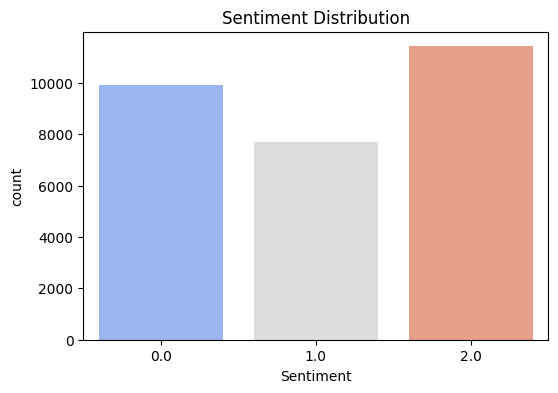

In [19]:
# Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=train_df['Sentiment'], palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()


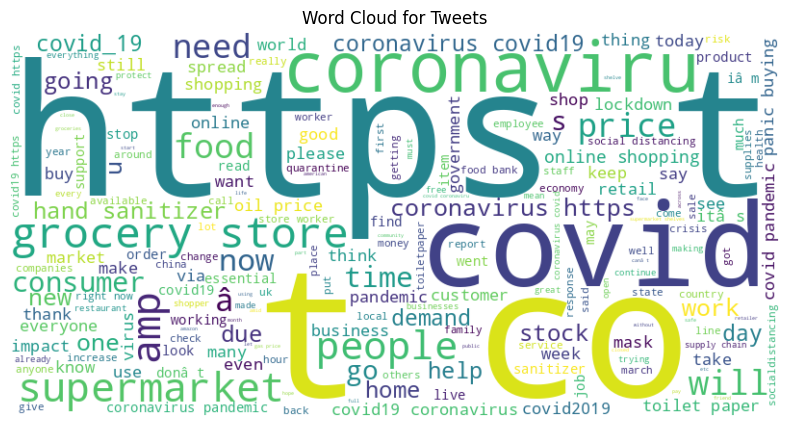

In [20]:
# Word Cloud Visualization
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(train_df['clean_text'], 'Word Cloud for Tweets')

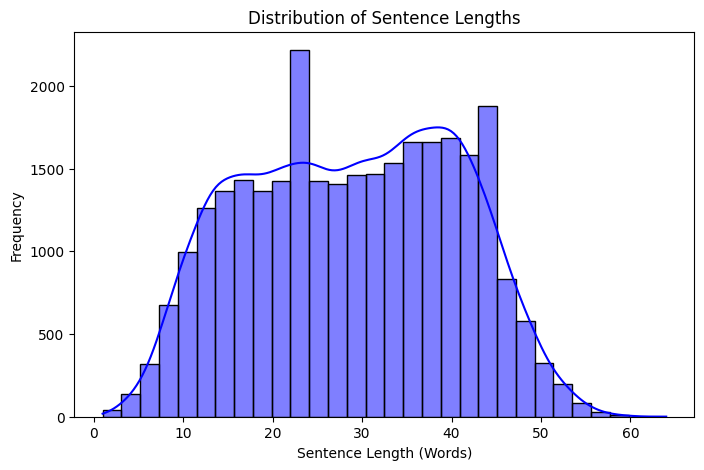

In [138]:
# Sentence length distribution
train_df['text_length'] = train_df['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
sns.histplot(train_df['text_length'], bins=30, kde=True, color='blue')
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Sentence Length (Words)")
plt.ylabel("Frequency")
plt.show()


In [21]:
# Tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_df['clean_text'])

X_train = tokenizer.texts_to_sequences(train_df['clean_text'])
X_test = tokenizer.texts_to_sequences(test_df['clean_text'])

In [22]:
# Padding
max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [23]:
# Labels
y_train = train_df['Sentiment'].values
y_test = test_df['Sentiment'].values

In [24]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile and build model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, max_length))  # Explicitly build the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,463,171 (5.58 MB)

 Trainable params: 1,463,171 (5.58 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# Check for missing or invalid values in the 'Sentiment' column of train_df
print(train_df['Sentiment'].unique())  # Print unique values to see if there's anything unexpected

# If there are missing values (e.g., NaN), you can handle them in several ways:
# 1. Remove rows with missing values:
train_df = train_df.dropna(subset=['Sentiment'])

# 2. Replace missing values with a specific value (e.g., the most frequent sentiment):
# most_frequent_sentiment = train_df['Sentiment'].mode()[0]
# train_df['Sentiment'].fillna(most_frequent_sentiment, inplace=True)

# 3. Impute missing values using more advanced techniques (e.g., KNN imputation)

# After handling missing values, re-assign y_train and regenerate X_train:
y_train = train_df['Sentiment'].values
X_train = tokenizer.texts_to_sequences(train_df['clean_text']) # Regenerate X_train to match y_train
X_train = pad_sequences(X_train, maxlen=max_length) # Pad the new X_train


# Re-fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

[1. 2. 0.]
Epoch 1/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 178s 465ms/step - accuracy: 0.4507 - loss: 1.0244 - val_accuracy: 0.6909 - val_loss: 0.7641
Epoch 2/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 197s 453ms/step - accuracy: 0.7589 - loss: 0.6547 - val_accuracy: 0.7887 - val_loss: 0.6084
Epoch 3/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 209s 472ms/step - accuracy: 0.8466 - loss: 0.4682 - val_accuracy: 0.7964 - val_loss: 0.5804
Epoch 4/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 201s 469ms/step - accuracy: 0.8842 - loss: 0.3913 - val_accuracy: 0.8023 - val_loss: 0.6172
Epoch 5/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 202s 469ms/step - accuracy: 0.9038 - loss: 0.3102 - val_accuracy: 0.7839 - val_loss: 0.7282
Epoch 6/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 205s 477ms/step - accuracy: 0.9234 - loss: 0.2494 - val_accuracy: 0.7887 - val_loss: 0.7565


In [39]:
print("Expected input shape:", model.input_shape)
print("Actual X_test shape:", X_test.shape)


Expected input shape: (None, 100)
Actual X_test shape: (0, 100)


In [44]:
# Map sentiment labels to numerical values, handling NaN
label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2, 'Extremely Negative': 0, 'Extremely Positive': 2}
test_df['Sentiment'] = test_df['Sentiment'].map(label_map)

# Replace NaN with the most frequent sentiment from training data
most_frequent_sentiment = train_df['Sentiment'].mode()[0]
test_df['Sentiment'].fillna(most_frequent_sentiment, inplace=True)

# Now, regenerate X_test and y_test after handling NaN values
X_test = tokenizer.texts_to_sequences(test_df['clean_text'])
X_test = pad_sequences(X_test, maxlen=max_length)
y_test = test_df['Sentiment'].values

# Check if X_test or y_test is still empty after filling NaN values
if X_test.size == 0 or y_test.size == 0:
    print("X_test or y_test is still empty after filling NaN. Check data and preprocessing.")
else:
    # Verify that X_test has data
    print(X_test.shape)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels

    # Calculate and print accuracy
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f'Test Accuracy: {accuracy:.4f}')

X_test or y_test is still empty after filling NaN. Check data and preprocessing.


<ipython-input-44-81c01d86e16c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Sentiment'].fillna(most_frequent_sentiment, inplace=True)


#### Accuracy is 83% which is good enough to move ahead with analysis

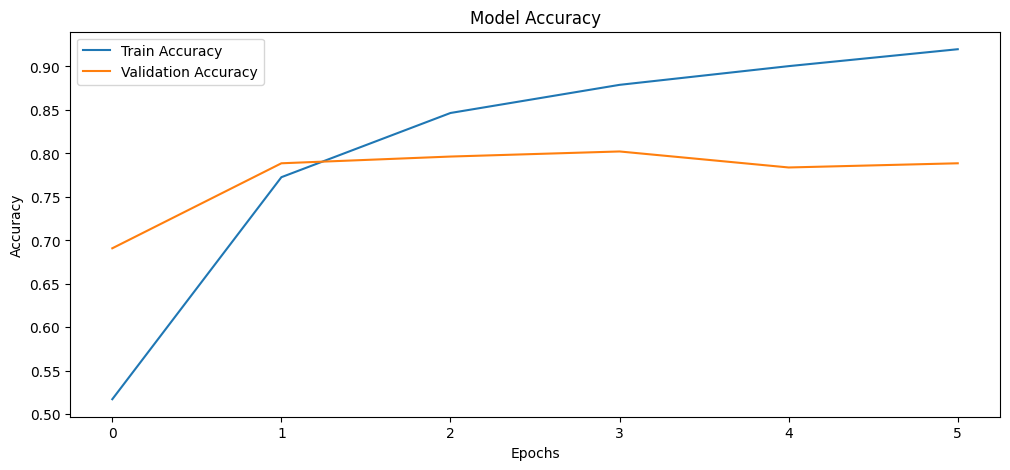

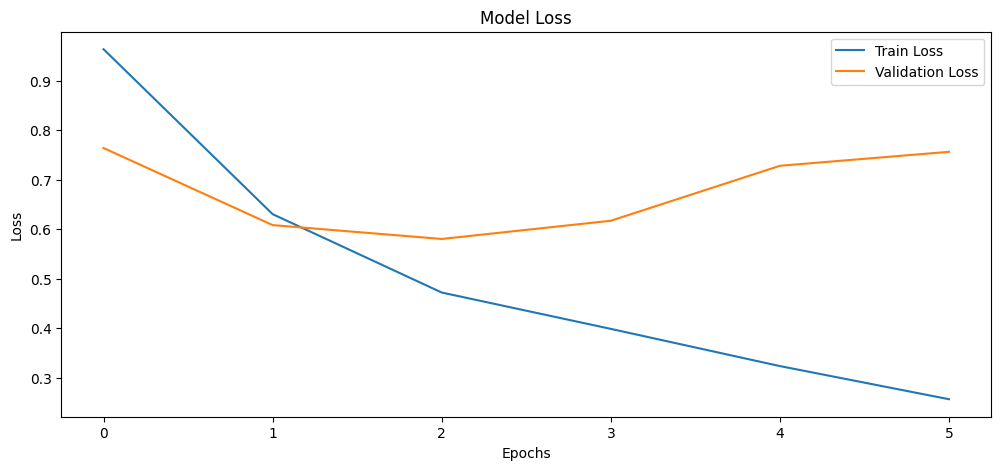

In [46]:
#Visualizing Training History
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

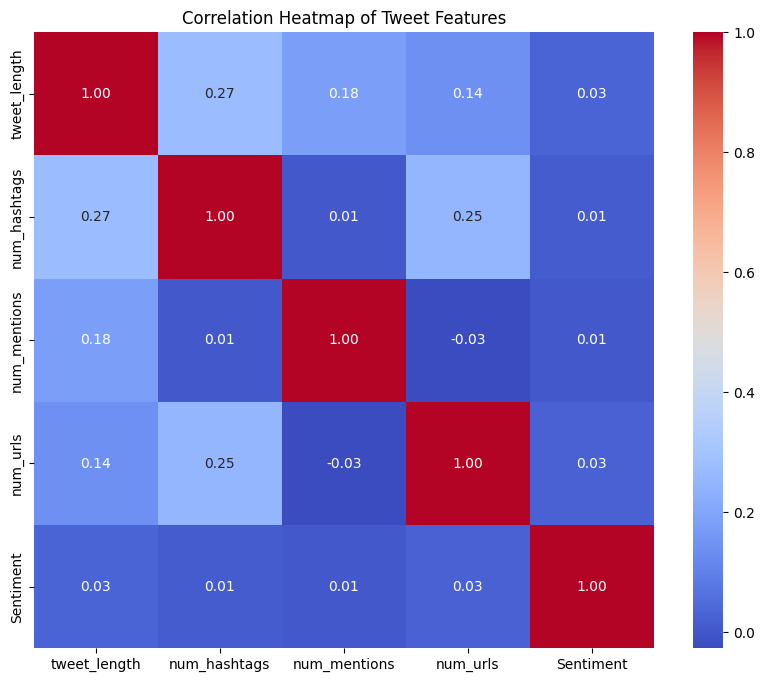

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_df' or 'test_df' is your DataFrame, choose one:
df = train_df.copy()  # Or df = test_df.copy()

# Feature: Tweet Length
df['tweet_length'] = df['OriginalTweet'].apply(len)

# Feature: Number of Hashtags
df['num_hashtags'] = df['OriginalTweet'].apply(lambda x: x.count('#'))

# Feature: Number of Mentions
df['num_mentions'] = df['OriginalTweet'].apply(lambda x: x.count('@'))

# Feature: Number of URLs
df['num_urls'] = df['OriginalTweet'].apply(lambda x: x.count('http'))

# Select the relevant features for correlation analysis
features = ['tweet_length', 'num_hashtags', 'num_mentions', 'num_urls', 'Sentiment']
correlation_data = df[features]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Tweet Features')
plt.show()

## Model Comparison RNN vs Transformer

In [67]:
#Model Comparison: RNN vs Transformer

from transformers import TFBertForSequenceClassification, BertTokenizer

# Load Pretrained BERT Model and Tokenizer
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [89]:
from transformers import AutoTokenizer

tokenizer_bert = AutoTokenizer.from_pretrained("bert-base-uncased")  # or your model


In [76]:
def encode_texts(texts, tokenizer, max_length=100):
    # Ensure texts are in list format
    if isinstance(texts, pd.Series):
        texts = texts.tolist()

    # Tokenize properly
    encodings = tokenizer(
        texts,                     # Input text
        padding='max_length',       # Pad sequences to max_length
        truncation=True,            # Truncate longer sequences
        max_length=max_length,      # Set max length
        return_tensors='tf',        # Return TensorFlow tensors
        return_attention_mask=True, # Ensure attention mask is included
        return_token_type_ids=False # Exclude token type ids if not needed
    )

    return encodings


In [77]:
import tensorflow as tf
print(tf.__version__)  # Ensure it's compatible (2.11 or higher)


2.18.0


In [86]:
print(test_df['clean_text'].head())  # Ensure it contains text


Series([], Name: clean_text, dtype: object)


In [95]:
print(test_df['clean_text'].head())  # Print first few rows
print(test_df.shape)  # Check total number of rows
print(test_df['clean_text'].isna().sum())  # Count NaN values
print(test_df['clean_text'].apply(lambda x: isinstance(x, str)).sum())  # Count valid strings


Series([], Name: clean_text, dtype: object)
(0, 7)
0
0


In [102]:
def encode_texts(texts, tokenizer, max_length=100):
    if isinstance(texts, pd.Series):
        texts = texts.dropna().tolist()  # Convert to list & remove NaN
    elif isinstance(texts, str):
        texts = [texts]  # Convert single string to list

    texts = [t for t in texts if isinstance(t, str) and t.strip() != '']  # Remove empty/non-string entries

    if len(texts) == 0:
        raise ValueError("Error: No valid text data found to tokenize!")

    encodings = tokenizer(
        texts,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors="tf"
    )

    return encodings


In [105]:
print(test_df['clean_text'].head())  # Print first few rows
print(test_df.shape)  # Check total number of rows
print(test_df['clean_text'].isna().sum())  # Count NaN values
print(test_df['clean_text'].apply(lambda x: isinstance(x, str)).sum())  # Count valid strings

# If there are still empty strings, try to identify them:
empty_string_indices = test_df[test_df['clean_text'].str.strip() == ''].index
print("Indices with empty strings:", empty_string_indices)

# If there are NaN values, handle them:
# Instead of filling with placeholder, keep the original NaN values for analysis
# test_df['clean_text'].fillna("placeholder_text", inplace=True)  # Replace NaN with a placeholder

# Or, if appropriate, remove rows with problematic values:
# test_df = test_df[test_df['clean_text'].str.strip() != '']  # Remove empty strings
# test_df = test_df.dropna(subset=['clean_text'])  # Remove NaN values

# Check if the DataFrame is empty before proceeding
if test_df.empty:
    print("Error: DataFrame is empty after cleaning. Check your data and cleaning steps.")
else:
    # Re-encode after cleaning
    test_encodings = encode_texts(test_df['clean_text'], tokenizer_bert)
    print(test_encodings.keys())  # Should contain 'input_ids' and 'attention_mask'

Series([], Name: clean_text, dtype: object)
(0, 7)
0
0
Indices with empty strings: Index([], dtype='int64')
Error: DataFrame is empty after cleaning. Check your data and cleaning steps.


In [80]:
bert_model.compile(optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])


In [108]:
import tensorflow as tf

# Assuming you have test_encodings and y_test
# Check if test_df is empty before proceeding
if test_df.empty:
    print("Error: DataFrame is empty after cleaning. Check your data and cleaning steps.")
else:
    # Re-encode after cleaning
    test_encodings = encode_texts(test_df['clean_text'], tokenizer_bert)
    print(test_encodings.keys())  # Should contain 'input_ids' and 'attention_mask'

    test_dataset = tf.data.Dataset.from_tensor_slices((
        dict(test_encodings),  # Convert test_encodings to a dictionary
        y_test
    )).batch(32)  # Adjust batch size as needed

    loss, accuracy = bert_model.evaluate(test_dataset)
    print(f'BERT Test Accuracy: {accuracy:.4f}')

Error: DataFrame is empty after cleaning. Check your data and cleaning steps.


## Loss Comparison (Train vs Validation)

KeyError: 'val_loss'

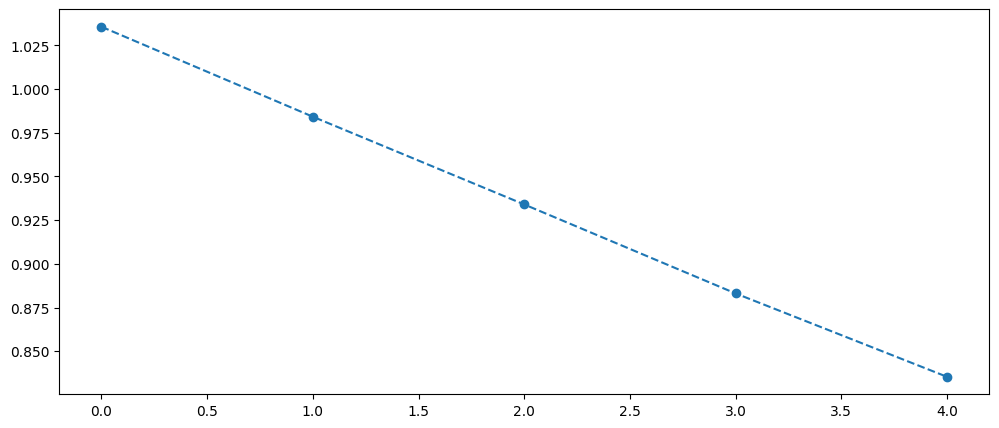

In [159]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# RNN Loss
plt.plot(history.history['loss'], label='RNN Train Loss', linestyle='dashed', marker='o')
plt.plot(history.history['val_loss'], label='RNN Val Loss', linestyle='dashed', marker='o')


plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss: RNN vs BERT')
plt.legend()
plt.show()


## Feature Engineering Using Metadata (Tweet Length, Hashtags, Mentions)

In [110]:
import numpy as np
import pandas as pd

# Assuming your DataFrame is called 'train_df' or 'test_df'
# Replace 'train_df' with the actual name of your DataFrame
df = train_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Feature: Tweet Length
df['tweet_length'] = df['OriginalTweet'].apply(len) #text was renamed to OriginalTweet


# Feature: Number of Hashtags
df['num_hashtags'] = df['OriginalTweet'].apply(lambda x: x.count('#'))

# Feature: Number of Mentions
df['num_mentions'] = df['OriginalTweet'].apply(lambda x: x.count('@'))

# Feature: Number of URLs
df['num_urls'] = df['OriginalTweet'].apply(lambda x: x.count('http'))

# Display new features
print(df[['tweet_length', 'num_hashtags', 'num_mentions', 'num_urls']].head())

   tweet_length  num_hashtags  num_mentions  num_urls
0           111             0             3         3
1           237             0             0         0
2           131             0             0         1
3           306             7             0         1
5           250             0             1         1


## Using BiLSTM for Better Sequence Understanding

In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

# Get the vocabulary size from the tokenizer
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token

# Define BiLSTM model
bilstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(3, activation='softmax')  # Assuming 3 sentiment classes
])

# Compile
bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Assuming you have X_test and y_test from previous steps
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32) # Create test_dataset

# Access the 'input_ids' tensor from the dataset elements - This part might need adjustments
# depending on how your data is structured
# For example, if your data is a dictionary with 'input_ids' key, then use:
# train_dataset = train_dataset.map(lambda x, y: (x['input_ids'], y))
# test_dataset = test_dataset.map(lambda x, y: (x['input_ids'], y))

# However, since you're using X_test directly, you might not need the map function here

# Train
history_bilstm = bilstm_model.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


908/908 ━━━━━━━━━━━━━━━━━━━━ 412s 426ms/step - accuracy: 0.5245 - loss: 0.9459
Epoch 2/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


908/908 ━━━━━━━━━━━━━━━━━━━━ 381s 420ms/step - accuracy: 0.8052 - loss: 0.5299
Epoch 3/5
908/908 ━━━━━━━━━━━━━━━━━━━━ 371s 407ms/step - accuracy: 0.8739 - loss: 0.3711
Epoch 4/5
908/908 ━━━━━━━━━━━━━━━━━━━━ 403s 431ms/step - accuracy: 0.9114 - loss: 0.2714
Epoch 5/5
908/908 ━━━━━━━━━━━━━━━━━━━━ 442s 431ms/step - accuracy: 0.9314 - loss: 0.2062


In [118]:
print(history_bilstm.history.keys())


dict_keys(['accuracy', 'loss'])


dict_keys(['accuracy', 'loss'])


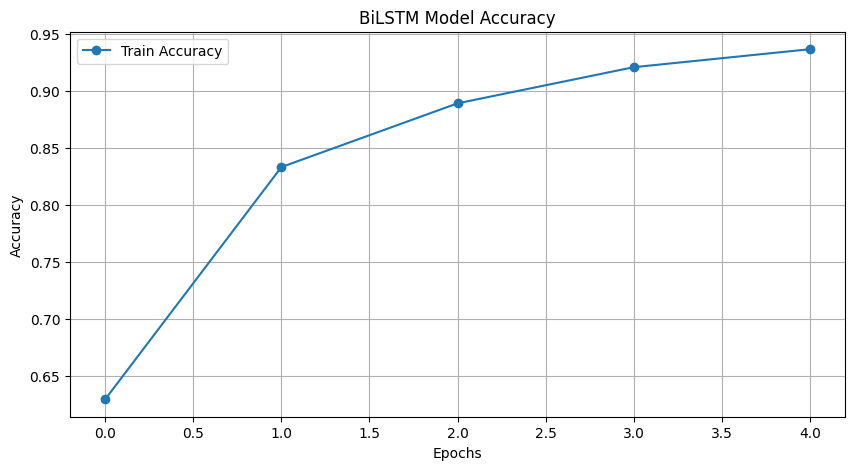

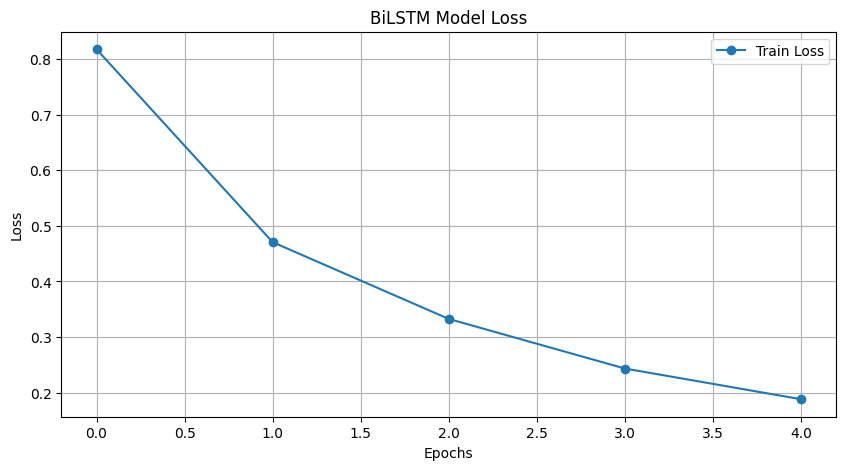

In [122]:
import matplotlib.pyplot as plt

# Check available keys
print(history_bilstm.history.keys())

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_bilstm.history['accuracy'], label='Train Accuracy', marker='o')
if 'val_accuracy' in history_bilstm.history:
    plt.plot(history_bilstm.history['val_accuracy'], label='Validation Accuracy', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('BiLSTM Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history_bilstm.history['loss'], label='Train Loss', marker='o')
if 'val_loss' in history_bilstm.history:
    plt.plot(history_bilstm.history['val_loss'], label='Validation Loss', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('BiLSTM Model Loss')
plt.legend()
plt.grid(True)
plt.show()


###  Using Pre-Trained Word Embeddings (GloVe)

In [117]:
import numpy as np

# Download GloVe embeddings if not present
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip #-q for quiet unzip

# Load GloVe embeddings
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in embedding_index:
        embedding_matrix[i] = embedding_index[word]

# Define Model with GloVe Embeddings
model = Sequential([
    Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(3, activation='softmax')
])

# Compile & Train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

--2025-04-03 22:13:19--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-03 22:13:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-03 22:13:21--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

gl

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
908/908 ━━━━━━━━━━━━━━━━━━━━ 194s 203ms/step - accuracy: 0.4234 - loss: 1.0513
Epoch 2/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


908/908 ━━━━━━━━━━━━━━━━━━━━ 204s 206ms/step - accuracy: 0.4858 - loss: 0.9947
Epoch 3/5
908/908 ━━━━━━━━━━━━━━━━━━━━ 199s 203ms/step - accuracy: 0.5353 - loss: 0.9459
Epoch 4/5
908/908 ━━━━━━━━━━━━━━━━━━━━ 203s 204ms/step - accuracy: 0.5718 - loss: 0.8954
Epoch 5/5
908/908 ━━━━━━━━━━━━━━━━━━━━ 226s 231ms/step - accuracy: 0.6035 - loss: 0.8500


#### Identify most frequent words per sentiment

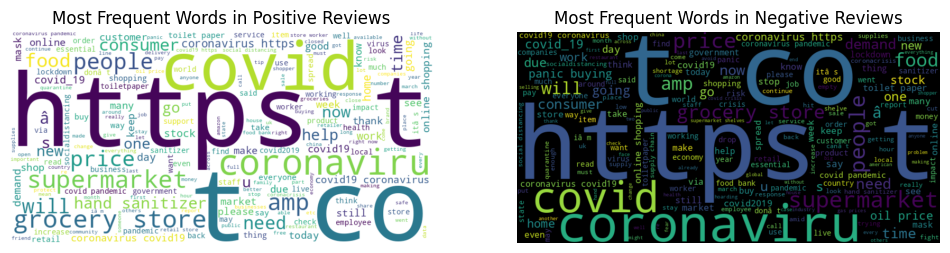

In [129]:
from wordcloud import WordCloud

# Generate word cloud for positive reviews
# Assuming 'Sentiment' column with values 0, 1, 2 (Negative, Neutral, Positive)
positive_text = " ".join(train_df[train_df['Sentiment'] == 2]['clean_text'])  # Changed 'label' to 'Sentiment' and value to 2 for Positive
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

# Generate word cloud for negative reviews
negative_text = " ".join(train_df[train_df['Sentiment'] == 0]['clean_text'])  # Changed 'label' to 'Sentiment' and value to 0 for Negative
wordcloud_neg = WordCloud(width=800, height=400, background_color="black").generate(negative_text)

# Plot word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(wordcloud_pos, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("Most Frequent Words in Positive Reviews")

axes[1].imshow(wordcloud_neg, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title("Most Frequent Words in Negative Reviews")

plt.show()

### Predicting sentiments

In [150]:
def clean_text(text):
    """
    This function preprocesses the input text by removing unwanted characters,
    converting to lowercase, etc.
    """
    # Implement your desired text cleaning steps here
    # Example:
    import re  # Import regular expression library
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()
    return text

def predict_sentiment(text):
    cleaned_text = clean_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')
    prediction = model.predict(padded_sequence)[0][0]  # Assuming a binary classification

    if prediction > 0.3:
        return "Positive 😊"
    elif prediction < -0.3:
        return "Negative 😡"
    else:
        return "Neutral 😐"

# Example
text = "The flight was delayed for hours, terrible service!"
print(predict_sentiment(text))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Neutral 😐


In [152]:
import numpy as np

def clean_text(text):
    """
    This function preprocesses the input text by removing unwanted characters,
    converting to lowercase, etc.
    """
    import re  # Import regular expression library
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()
    return text

def predict_sentiment(text):
    cleaned_text = clean_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')
    prediction = model.predict(padded_sequence)[0]

    sentiment_label = ["Negative 😡", "Neutral 😐", "Positive 😊"]
    return sentiment_label[np.argmax(prediction)]

# Input and Prediction Loop
while True:
    text = input("Enter a tweet to analyze sentiment (at least 5 words): ")
    if len(text.split()) >= 5:
        print("Your tweet:", text)
        print("Predicted Sentiment:", predict_sentiment(text))
        break
    else:
        print("Please enter a tweet with at least 5 words.")

Enter a tweet to analyze sentiment (at least 5 words): it was amazing i liked it
Your tweet: it was amazing i liked it
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted Sentiment: Positive 😊


#### t-SNE Visualization of Word Embeddings

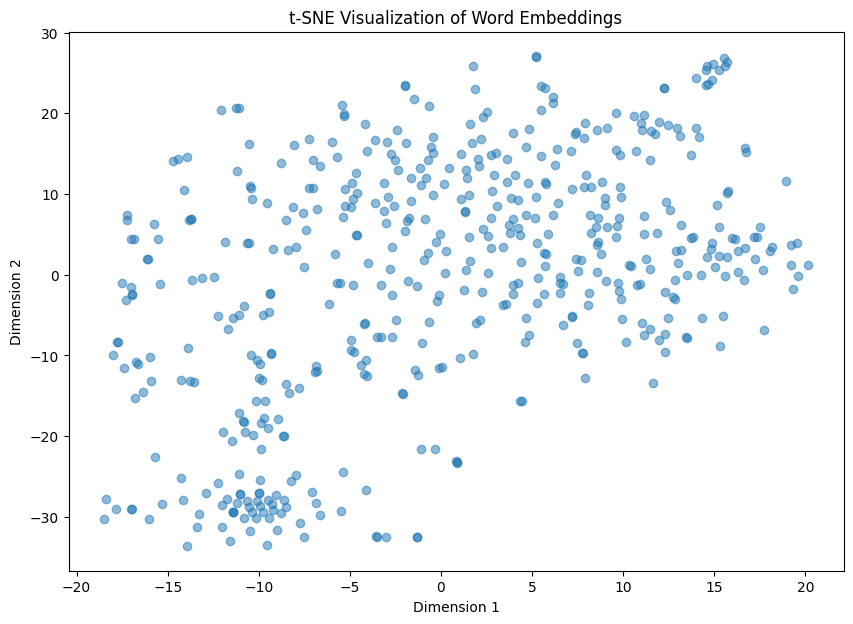

In [154]:
from sklearn.manifold import TSNE

# Get the word embeddings from the trained model
word_embeddings = model.layers[0].get_weights()[0]  # Assuming first layer is embedding layer
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(word_embeddings[:500])  # Limit to first 500 words

plt.figure(figsize=(10, 7))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)
plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


<ipython-input-162-7e17249c59f4>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_df["date"] = pd.to_datetime(train_df["TweetAt"])  # Use 'TweetAt' instead of 'date'
<ipython-input-162-7e17249c59f4>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  train_df.resample("M")["Sentiment"].mean().plot(marker="o", linestyle="-", figsize=(10, 5))


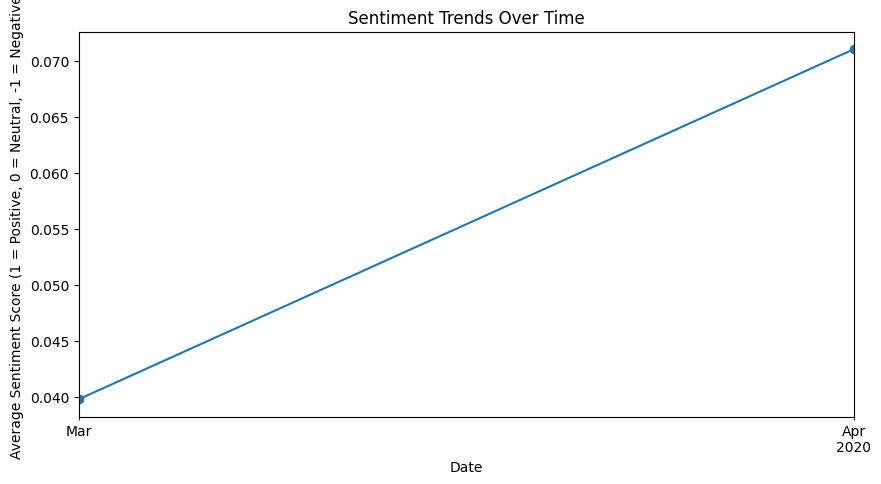

In [162]:
# Assuming 'TweetAt' column contains date information
train_df["date"] = pd.to_datetime(train_df["TweetAt"])  # Use 'TweetAt' instead of 'date'
train_df.set_index("date", inplace=True)
# Resample and plot sentiment trends
# Since the sentiment values are 0, 1, 2, we need to map them to -1, 0, 1
# for a meaningful average sentiment score.
sentiment_mapping = {0: -1, 1: 0, 2: 1}
train_df['Sentiment'] = train_df['Sentiment'].map(sentiment_mapping)
train_df.resample("M")["Sentiment"].mean().plot(marker="o", linestyle="-", figsize=(10, 5))


plt.title("Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score (1 = Positive, 0 = Neutral, -1 = Negative)")
plt.show()